In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Dependencies

In [ ]:
!pip install --pre pycaret
!pip install "schemdraw<0.16" #<-- To handle dependency issues

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 M

In [ ]:
# Run this for more advanced tuning strategies 
# check documentation: https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.ClassificationExperiment.tune_model
#!pip install pycaret[tuners]

In [ ]:
# for some model interpretation functions
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.2 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=837055020daa26ff263f2569c5e11c978c8ffeb7ea2cc710038

## Load Dependencies and Data

In [ ]:
from pycaret.utils import version
version()

'3.0.2'

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

#plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
#plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
#plt.style.use("fivethirtyeight")
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/telecom_users.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [ ]:
df["Churn"].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

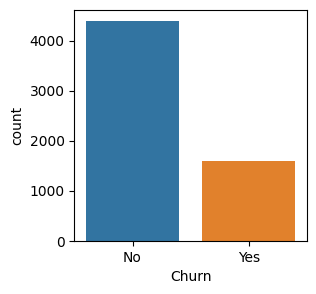

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x=df["Churn"])

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
Missing TotalCharges have tenure of 0- They just joined. So total charges= Monthly charges.

In [ ]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.apply(lambda x: x.nunique())

customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/telecom_users.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df["TotalCharges"]= pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TenureToAgeRatio'] = df['tenure'] / (df['tenure'] + df['SeniorCitizen'] + 1)
df["SeniorCitizen"]= df['SeniorCitizen'].astype(str)
df['TotalCharges'].fillna(0, inplace=True)

df['PaymentMethod'] = df['PaymentMethod'].replace(['Credit card (automatic)','Bank transfer (automatic)'], 'Automatic')

df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)
# fee per service
df["AVG_Service_Fee"] = df["MonthlyCharges"] / (df['TotalServices'] + 1)
#ratio of monthly charges to the tenure
df['MonthlyChargesRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)

df=df.drop(columns="PhoneService")

df.set_index("customerID", inplace=True)

df


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureToAgeRatio,TotalServices,AVG_Service_Fee,MonthlyChargesRatio
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,Two year,No,Automatic,24.10,1734.65,No,0.986301,1,12.050000,0.330137
9688-YGXVR,Female,0,No,No,44,No,Fiber optic,No,Yes,Yes,...,Month-to-month,Yes,Automatic,88.15,3973.20,No,0.977778,4,17.630000,1.958889
9286-DOJGF,Female,1,Yes,No,38,Yes,Fiber optic,No,No,No,...,Month-to-month,Yes,Automatic,74.95,2869.85,Yes,0.950000,1,37.475000,1.921795
6994-KERXL,Male,0,No,No,4,No,DSL,No,No,No,...,Month-to-month,Yes,Electronic check,55.90,238.50,No,0.800000,2,18.633333,11.180000
2181-UAESM,Male,0,No,No,2,No,DSL,Yes,No,Yes,...,Month-to-month,No,Electronic check,53.45,119.50,No,0.666667,3,13.362500,17.816667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,Male,0,Yes,No,1,No,Fiber optic,Yes,No,No,...,Month-to-month,Yes,Electronic check,95.00,95.00,Yes,0.500000,4,19.000000,47.500000
5982-PSMKW,Female,0,Yes,Yes,23,Yes,DSL,Yes,Yes,Yes,...,Two year,Yes,Automatic,91.10,2198.30,No,0.958333,7,11.387500,3.795833
8044-BGWPI,Male,0,Yes,Yes,12,No,No,No internet service,No internet service,No internet service,...,Month-to-month,Yes,Electronic check,21.15,306.05,No,0.923077,1,10.575000,1.626923


In [ ]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,TenureToAgeRatio,TotalServices,AVG_Service_Fee,MonthlyChargesRatio,gender_Female,gender_Male,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,72,24.10,1734.65,0,0.986301,1,12.050000,0.330137,0,1,...,1,0,0,0,1,1,0,1,0,0
9688-YGXVR,44,88.15,3973.20,0,0.977778,4,17.630000,1.958889,1,0,...,0,0,1,0,0,0,1,1,0,0
9286-DOJGF,38,74.95,2869.85,1,0.950000,1,37.475000,1.921795,1,0,...,0,0,1,0,0,0,1,1,0,0
6994-KERXL,4,55.90,238.50,0,0.800000,2,18.633333,11.180000,0,1,...,0,1,1,0,0,0,1,0,1,0
2181-UAESM,2,53.45,119.50,0,0.666667,3,13.362500,17.816667,0,1,...,0,0,1,0,0,1,0,0,1,0


<Axes: >

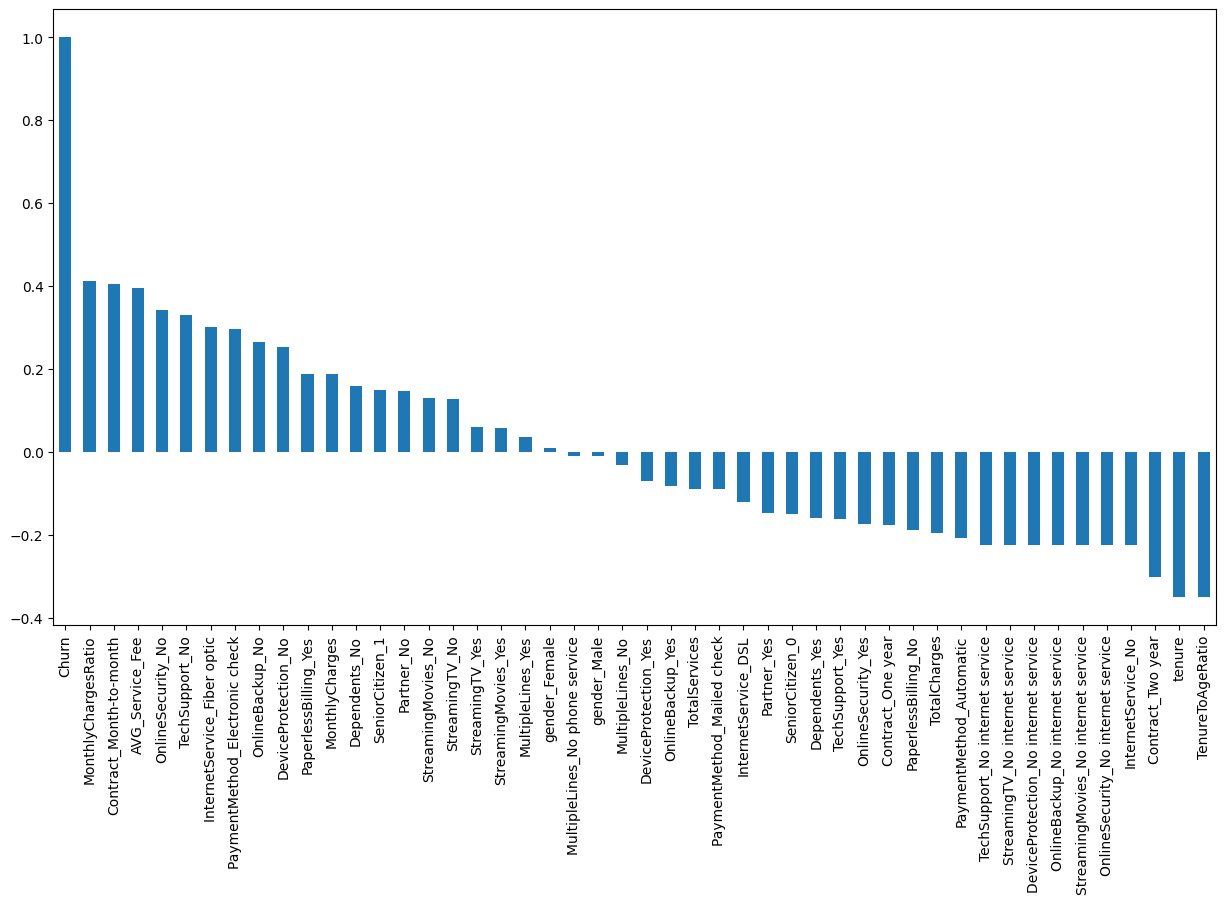

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# defining a function for getting percentages
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["Churn"], margins=True)).reset_index()
    tab['Percentage'] = tab[1] / tab['All'] * 100
    
    tab.columns = [var, 'Churn_NO', 'Churn_YES', 'Total', 'Churn Percentage']
    return tab

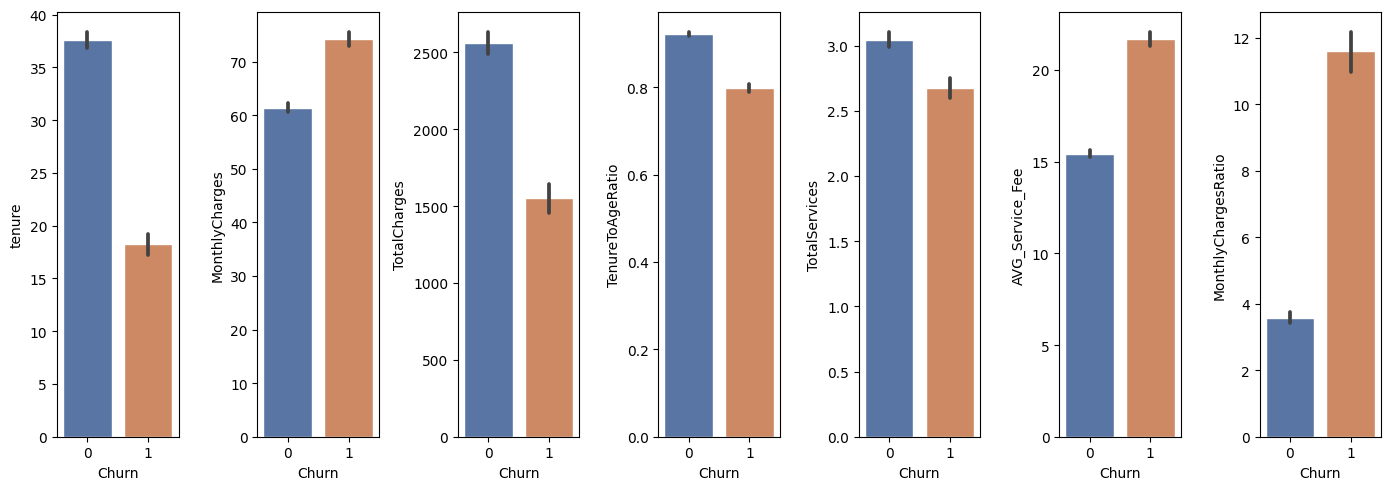

In [ ]:
numeric_features = df.drop(columns=["Churn"], axis=1).select_dtypes(include=['int', 'float']).columns
len(numeric_features)
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(14,5))

axes = axes.flatten()
sns.set(font_scale=0.8)
for i, column in enumerate(numeric_features):
    ax = axes[i]
    sns.barplot(data=df, y=column,x='Churn' ,ax=ax)

fig.tight_layout()

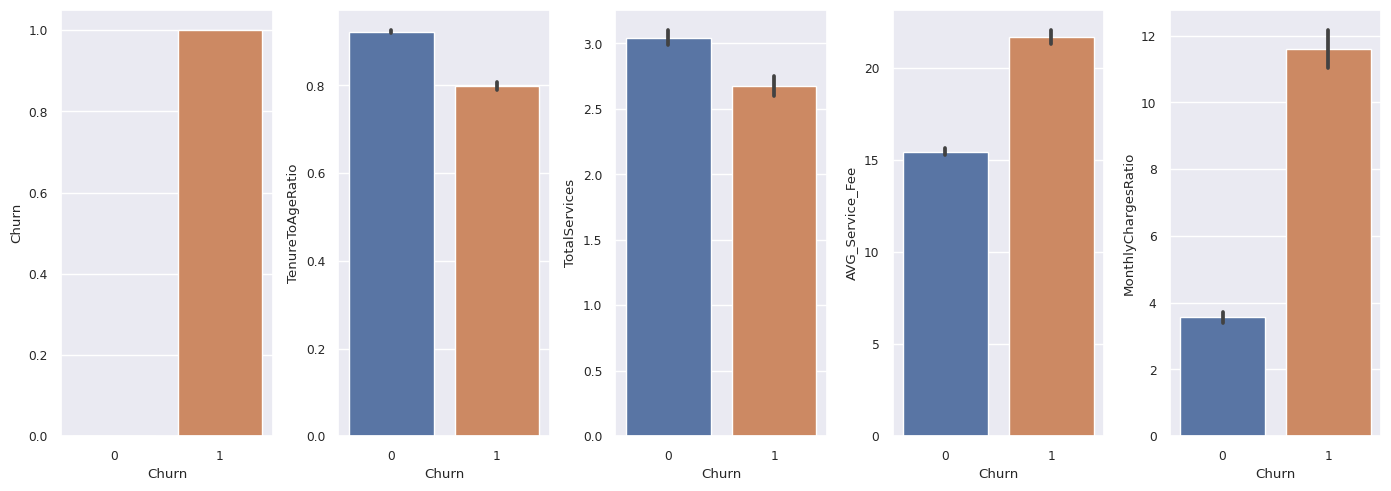

In [ ]:
numeric_features = df.drop(columns=["tenure",'MonthlyCharges','TotalCharges'], axis=1).select_dtypes(include=['int', 'float']).columns
len(numeric_features)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14,5))

axes = axes.flatten()
sns.set(font_scale=0.8)
for i, column in enumerate(numeric_features):
    ax = axes[i]
    sns.barplot(data=df, y=column,x='Churn' ,ax=ax)

fig.tight_layout()

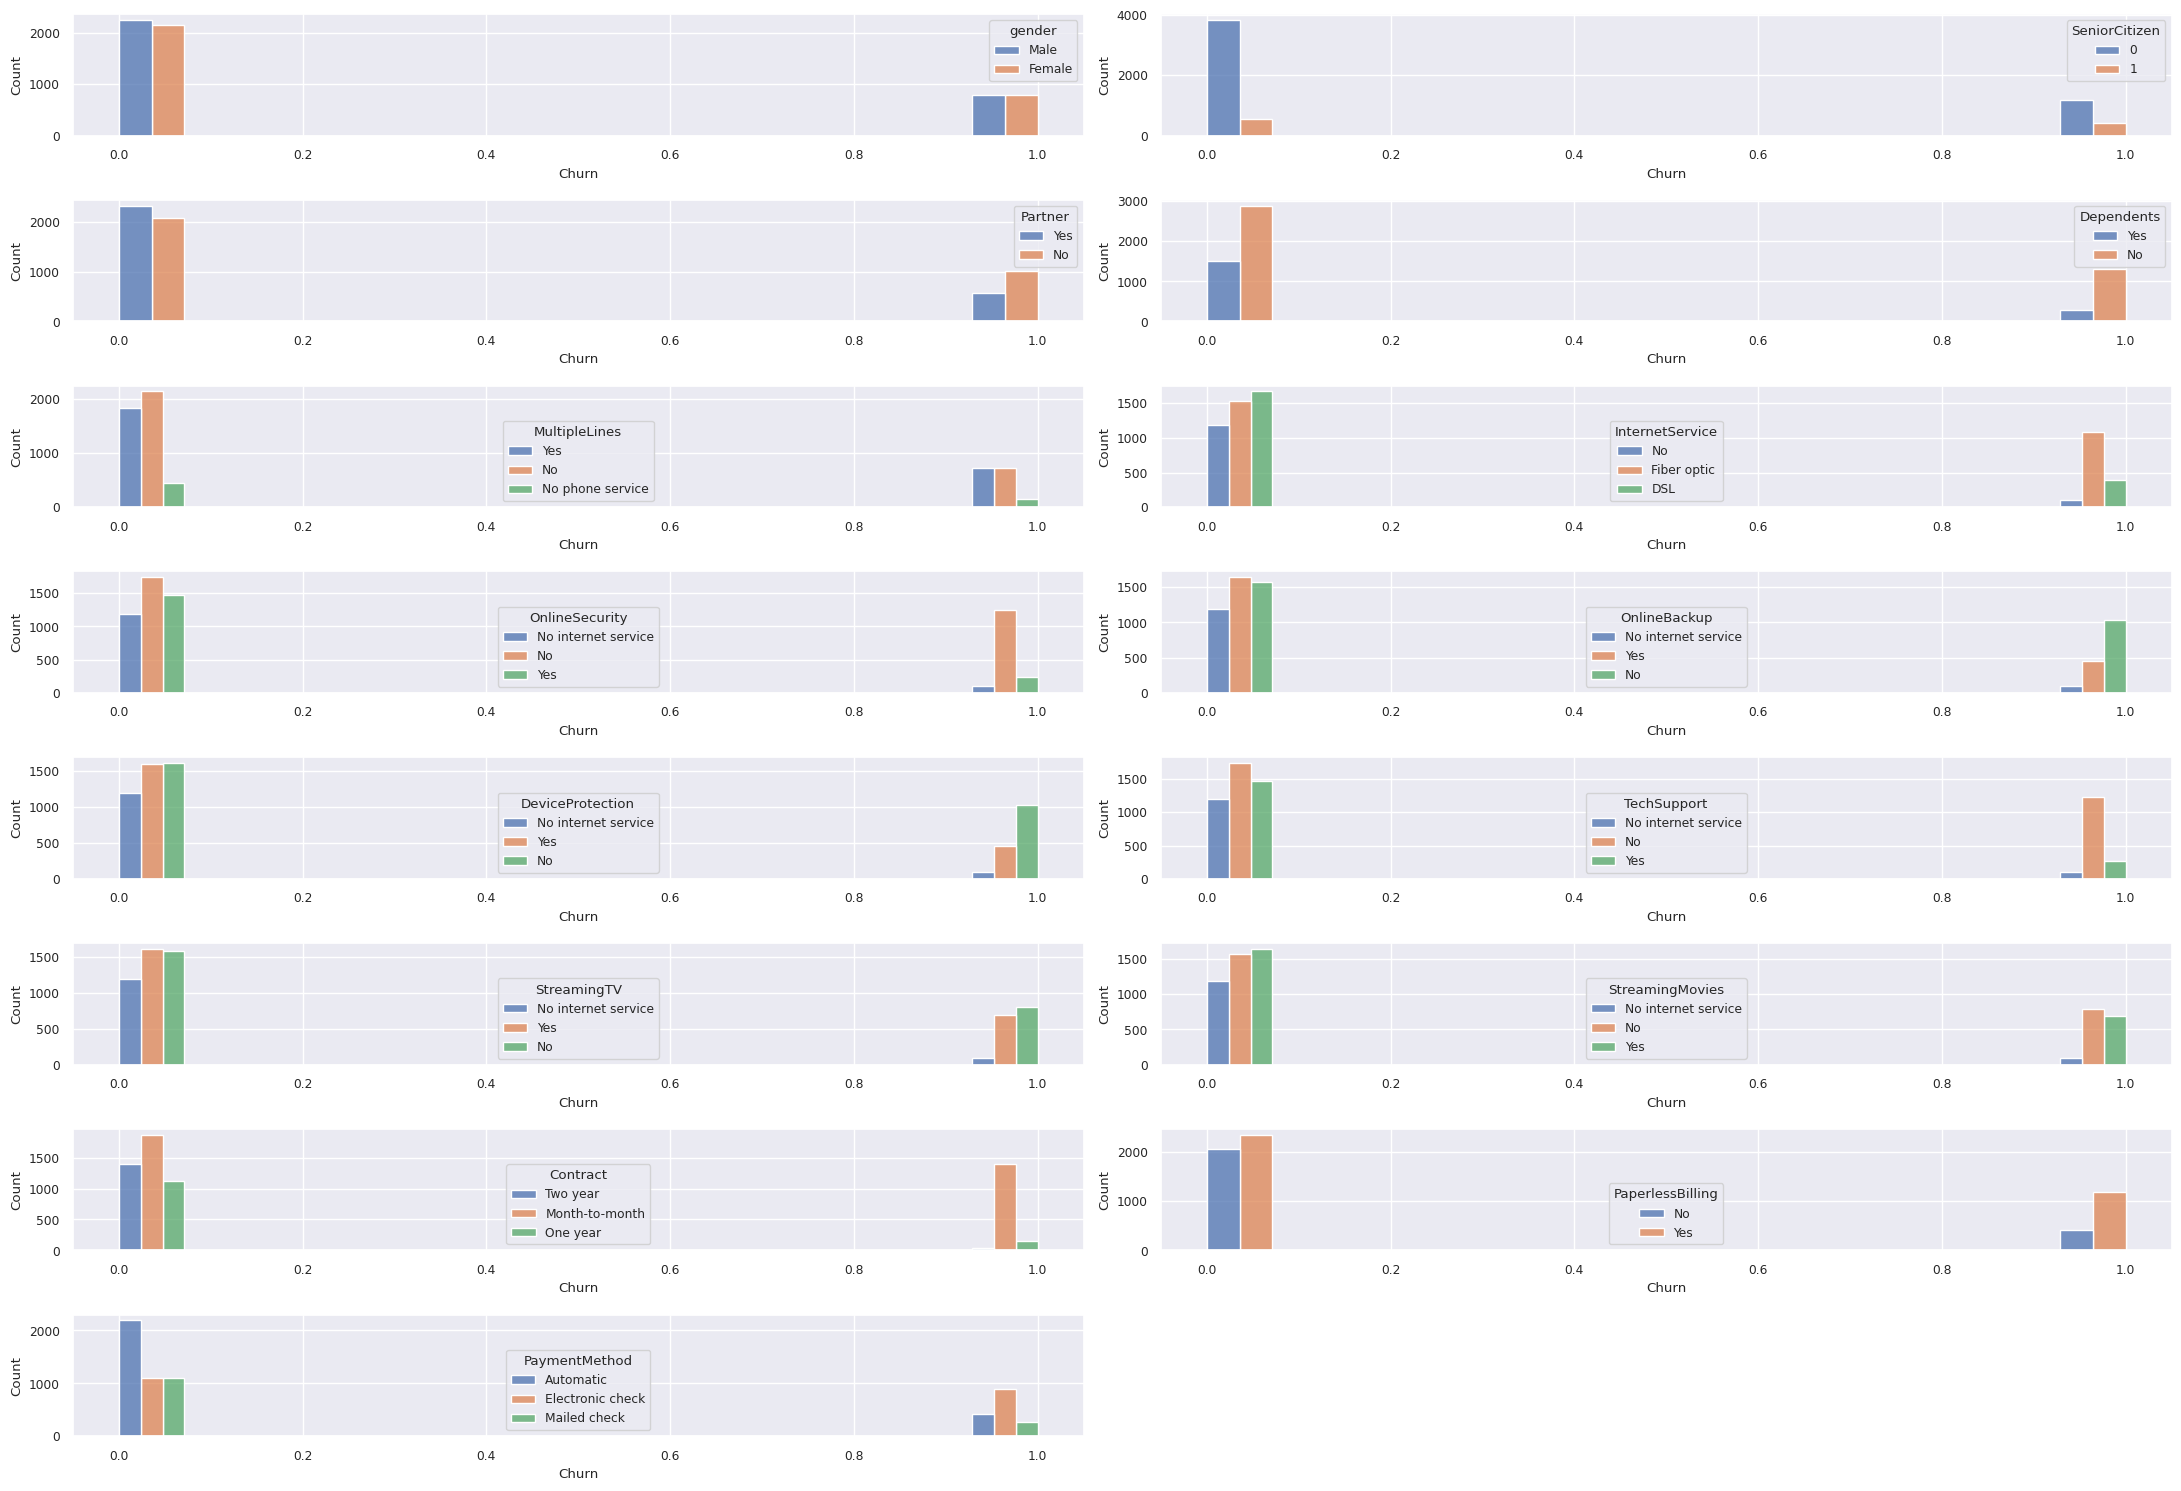

In [ ]:
categorical_features = df.select_dtypes(exclude=['int', 'float']).columns
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(22,15))
from pandas.plotting import table
axes = axes.flatten()
for i, column in enumerate(categorical_features):
    ax = axes[i]
    sns.histplot(data=df, hue=column,x='Churn' ,ax=ax, stat="count", multiple="dodge")
    mytable=crosstab_function(df,column)
    #ax.table(cellText=mytable.values, colLabels=mytable.keys(), loc='bottom')
    #table(ax, mytable, loc="bottom");
    
    
    
fig.tight_layout()
fig.delaxes(axes[15]);


In [ ]:
for i, column in enumerate(categorical_features):
    print(crosstab_function(df,column))


   gender  Churn_NO  Churn_YES  Total  Churn Percentage
0  Female      2145        791   2936         26.941417
1    Male      2254        796   3050         26.098361
2     All      4399       1587   5986         26.511861
  SeniorCitizen  Churn_NO  Churn_YES  Total  Churn Percentage
0             0      3835       1185   5020         23.605578
1             1       564        402    966         41.614907
2           All      4399       1587   5986         26.511861
  Partner  Churn_NO  Churn_YES  Total  Churn Percentage
0      No      2071       1011   3082         32.803374
1     Yes      2328        576   2904         19.834711
2     All      4399       1587   5986         26.511861
  Dependents  Churn_NO  Churn_YES  Total  Churn Percentage
0         No      2889       1306   4195         31.132300
1        Yes      1510        281   1791         15.689559
2        All      4399       1587   5986         26.511861
      MultipleLines  Churn_NO  Churn_YES  Total  Churn Percentage
0 

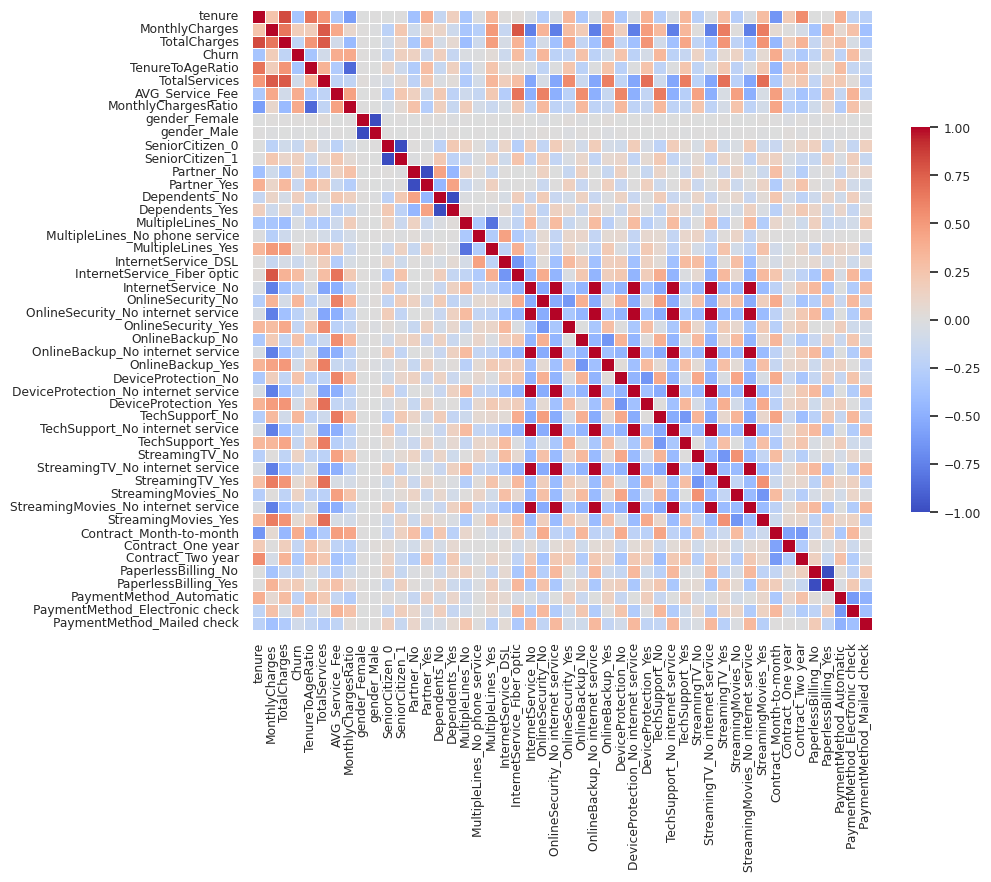

In [ ]:
corr = df_dummies.corr() # computing correlation values
fig, ax = plt.subplots(figsize=(10, 10)) # setting up the empty plot to use next
# Assembly of the heatmap:
h = sns.heatmap(corr, cmap="coolwarm",  vmax=1, fmt=".2f", center=0,square=True,linewidths=0.5,cbar_kws={"shrink": 0.5},)

In [ ]:
X=df.loc[:, ~df.columns.isin(['customerID', 'Churn'])]
Y = df.loc[:, ["Churn"]]
categorical_feature_idxs = np.where(X.dtypes == "object")[0]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train.index

Index(['4016-BJKTZ', '8982-NHAVY', '6685-XSHHU', '2782-LFZVW', '2325-ZUSFD',
       '8051-HJRLT', '0428-IKYCP', '1550-LOAHA', '0690-SRQID', '0334-GDDSO',
       ...
       '3389-KTRXV', '1697-NVVGY', '3352-RICWQ', '0673-IGUQO', '1090-ESELR',
       '5180-UCIIQ', '2428-ZMCTB', '8084-OIVBS', '1088-CNNKB', '8606-OEGQZ'],
      dtype='object', name='customerID', length=4788)

In [ ]:
from imblearn.over_sampling import SMOTENC
smtnc = SMOTENC(categorical_features=categorical_feature_idxs) # initialize the SMOTEENC object
X_train_smote, y_train_smote = smtnc.fit_resample(X_train, y_train) # try to generate new samples
X_train_smote

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureToAgeRatio,TotalServices,AVG_Service_Fee,MonthlyChargesRatio
0,Female,0,No,No,25,Yes,Fiber optic,No,Yes,Yes,...,Yes,Two year,No,Electronic check,108.900000,2809.050000,0.961538,6,15.557143,4.188462
1,Male,0,No,No,27,Yes,Fiber optic,No,No,Yes,...,Yes,One year,Yes,Automatic,100.500000,2673.450000,0.964286,4,20.100000,3.589286
2,Male,0,Yes,Yes,60,No,No,No internet service,No internet service,No internet service,...,No internet service,Two year,Yes,Automatic,20.950000,1270.550000,0.983607,1,10.475000,0.343443
3,Female,0,No,No,11,Yes,DSL,No,No,No,...,Yes,Month-to-month,Yes,Mailed check,58.950000,601.600000,0.916667,2,19.650000,4.912500
4,Female,0,Yes,Yes,57,No,DSL,Yes,No,No,...,Yes,One year,Yes,Automatic,70.100000,3913.300000,0.982759,4,14.020000,1.208621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,9,No,Fiber optic,No,No,No,...,Yes,Month-to-month,Yes,Electronic check,81.989735,748.180095,0.900000,2,23.224634,8.198973
7034,Female,1,No,No,1,No phone service,DSL,No,No,No,...,No,Month-to-month,No,Electronic check,25.236887,25.236887,0.333333,0,25.236887,12.618443
7035,Female,0,Yes,No,34,No,Fiber optic,No,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,91.522533,3048.699439,0.971524,3,22.746794,2.612387
7036,Male,0,No,No,3,No,Fiber optic,No,No,No,...,Yes,Month-to-month,Yes,Electronic check,84.662981,265.983036,0.681748,2,25.039690,21.165745


In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_train_cat = X_train_smote.select_dtypes(include='object')
X_train_num = X_train_smote.select_dtypes(exclude='object')

cat_cols = X_train_cat.columns
cat_dummy_encoder = OneHotEncoder(handle_unknown='ignore', )

X_train_cat_ohe = cat_dummy_encoder.fit_transform(X_train_cat).toarray()
cat_ohe_cols = cat_dummy_encoder.get_feature_names_out(cat_cols)
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,
                               columns=cat_ohe_cols)
#X_train_cat_ohe=X_train_cat_ohe.drop(columns=['OnlineSecurity_No internet service', 'OnlineBackup_No internet service','OnlineBackup_No internet service',
                                              #'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1)
X_train_cat_ohe.columns


Index(['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_A

In [ ]:
ss = StandardScaler()
num_cols = X_train_num.columns
X_train_num_scaled = ss.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled,
                                  columns=num_cols)
X_train_num_scaled.head()

,tenure,MonthlyCharges,TotalCharges,TenureToAgeRatio,TotalServices,AVG_Service_Fee,MonthlyChargesRatio
0,-0.106243,1.418256,0.356243,0.585034,1.870937,-0.427806,-0.341802
1,-0.022575,1.126639,0.293869,0.600841,0.713697,0.201098,-0.401165
2,1.357938,-1.635044,-0.351444,0.712003,-1.022163,-1.131368,-0.722747
3,-0.691915,-0.315824,-0.659152,0.326865,-0.443543,0.138801,-0.270068
4,1.232437,0.071263,0.864183,0.707124,0.713697,-0.640605,-0.637029


In [ ]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_ohe], axis=1)
final_columns = X_train.columns.tolist()
# just to maintain a proper column order
X_train = X_train[final_columns]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7038 non-null   float64
 1   MonthlyCharges                        7038 non-null   float64
 2   TotalCharges                          7038 non-null   float64
 3   TenureToAgeRatio                      7038 non-null   float64
 4   TotalServices                         7038 non-null   float64
 5   AVG_Service_Fee                       7038 non-null   float64
 6   MonthlyChargesRatio                   7038 non-null   float64
 7   gender_Female                         7038 non-null   float64
 8   gender_Male                           7038 non-null   float64
 9   SeniorCitizen_0                       7038 non-null   float64
 10  SeniorCitizen_1                       7038 non-null   float64
 11  Partner_No       

In [ ]:
# separate into cat and num features
X_test_cat = X_test[cat_cols]
X_test_num = X_test[num_cols]

# one hot encoding to encode categorical features
X_test_cat_ohe = cat_dummy_encoder.transform(X_test_cat).toarray()
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,  columns=cat_ohe_cols)


# standard scale num features
X_test_num_scaled = ss.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled,
                                  columns=num_cols)

X_test = pd.concat([X_test_num_scaled, X_test_cat_ohe], axis=1)
X_test = X_test[final_columns]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                1198 non-null   float64
 1   MonthlyCharges                        1198 non-null   float64
 2   TotalCharges                          1198 non-null   float64
 3   TenureToAgeRatio                      1198 non-null   float64
 4   TotalServices                         1198 non-null   float64
 5   AVG_Service_Fee                       1198 non-null   float64
 6   MonthlyChargesRatio                   1198 non-null   float64
 7   gender_Female                         1198 non-null   float64
 8   gender_Male                           1198 non-null   float64
 9   SeniorCitizen_0                       1198 non-null   float64
 10  SeniorCitizen_1                       1198 non-null   float64
 11  Partner_No       

In [ ]:
Feature Importance using LightGBM

In [ ]:
import lightgbm as lgb

model1=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=13, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,metrics='recall')
model1.fit(X_train, y_train_smote)


LGBMClassifier(metrics='recall', objective='binary', random_state=13)

In [ ]:
Important Features extraction using LightGBM

In [ ]:
feature_imp = pd.DataFrame({'Value':model1.feature_importances_,'Feature':X_train.columns}).sort_values(by="Value",ascending=False)
cols=feature_imp[feature_imp["Value"]>=30]["Feature"].values
feature_new=feature_imp[feature_imp["Value"]>=30]
print(feature_new)
print(cols)
print(len(cols))


    Value                         Feature
2     488                    TotalCharges
1     380                  MonthlyCharges
5     351                 AVG_Service_Fee
3     319                TenureToAgeRatio
6     316             MonthlyChargesRatio
0     174                          tenure
7      66                   gender_Female
4      61                   TotalServices
42     55             PaperlessBilling_No
45     50  PaymentMethod_Electronic check
21     47               OnlineSecurity_No
13     45                   Dependents_No
15     45                MultipleLines_No
9      42                 SeniorCitizen_0
39     39         Contract_Month-to-month
30     39                  TechSupport_No
36     37              StreamingMovies_No
24     36                 OnlineBackup_No
46     33      PaymentMethod_Mailed check
33     32                  StreamingTV_No
17     32               MultipleLines_Yes
['TotalCharges' 'MonthlyCharges' 'AVG_Service_Fee' 'TenureToAgeRatio'
 'Mont

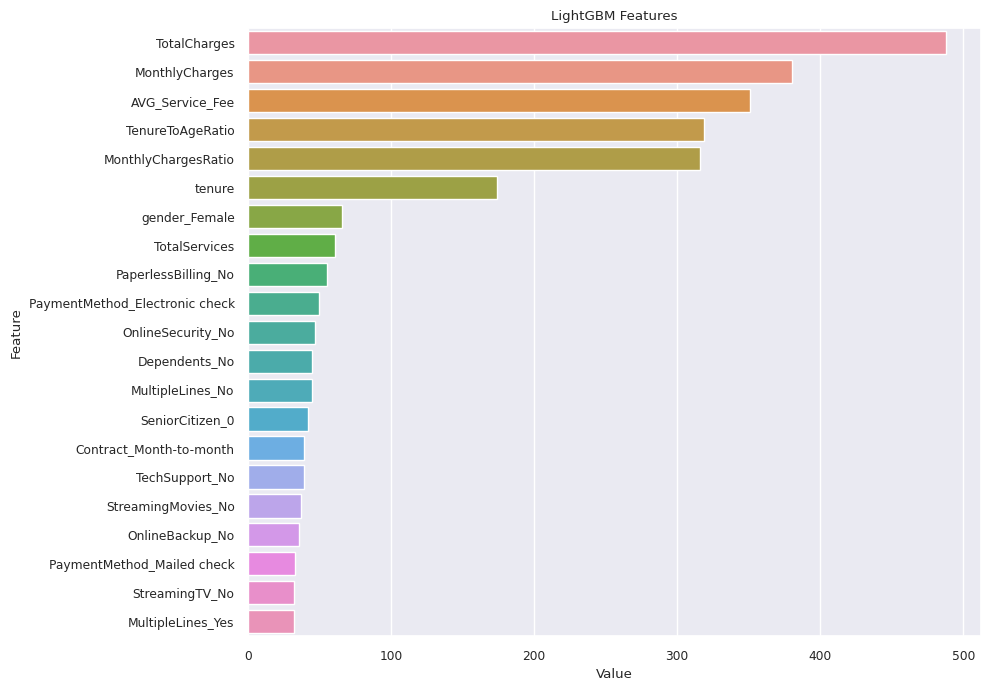

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x="Value", y="Feature", data=feature_new.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [ ]:
Plain Vanilla Model

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       880
           1       0.54      0.60      0.57       318

    accuracy                           0.76      1198
   macro avg       0.70      0.71      0.70      1198
weighted avg       0.77      0.76      0.76      1198



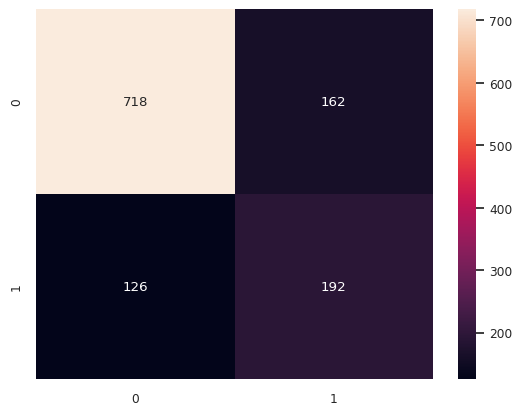

In [ ]:
y_pred = model1.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True, fmt='.0f');


In [ ]:
Model after selecting Features

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       880
           1       0.53      0.61      0.57       318

    accuracy                           0.75      1198
   macro avg       0.69      0.71      0.70      1198
weighted avg       0.77      0.75      0.76      1198



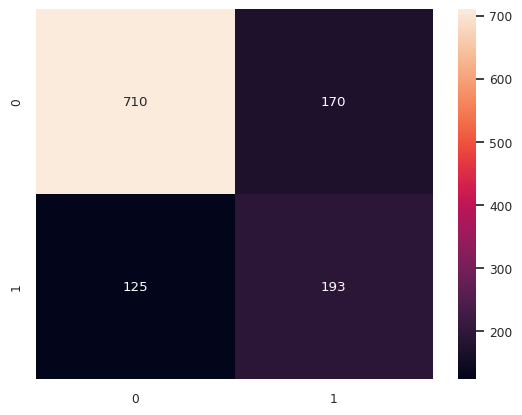

In [ ]:
select_X_train = X_train[cols]
select_X_test = X_test[cols]
model1.fit(select_X_train, y_train_smote)
pred_smote=model1.predict(select_X_test)
cf = confusion_matrix(y_test, pred_smote)
sns.heatmap(cf, annot=True, fmt='.0f');
print(classification_report(y_test, pred_smote))

In [ ]:
Hypertuning LightGBM model

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       880
           1       0.53      0.64      0.58       318

    accuracy                           0.75      1198
   macro avg       0.69      0.72      0.70      1198
weighted avg       0.77      0.75      0.76      1198



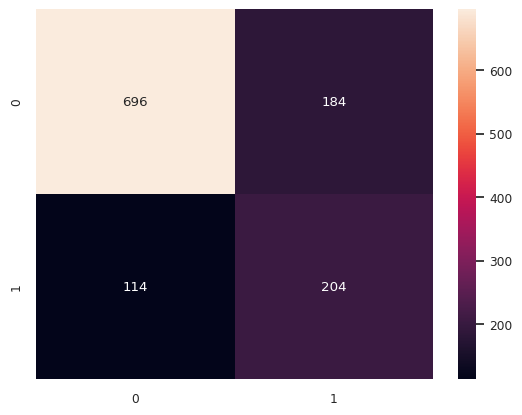

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_test ={'num_leaves': [10,20,50], 
             'boosting_type' : ['gbdt','dart'],
             'learning_rate': [0.01,0.1],
             'colsample_bytree' : [0.5,0.7],
             'subsample' : [0.5,0.7],
             'min_split_gain' : [0.01],             
             'max_depth' : [4, 5,6]}

# define the grid search procedure
grid_search = GridSearchCV(estimator=model1, param_grid=param_test, n_jobs=-1, cv=5, scoring='recall')
# execute the grid search
grid_result = grid_search.fit(select_X_train, y_train_smote)
best_model=grid_search.best_estimator_
best_model.fit(select_X_train, y_train_smote)
pred_smote=best_model.predict(select_X_test)
cf = confusion_matrix(y_test, pred_smote)
sns.heatmap(cf, annot=True, fmt='.0f');
print(classification_report(y_test, pred_smote))

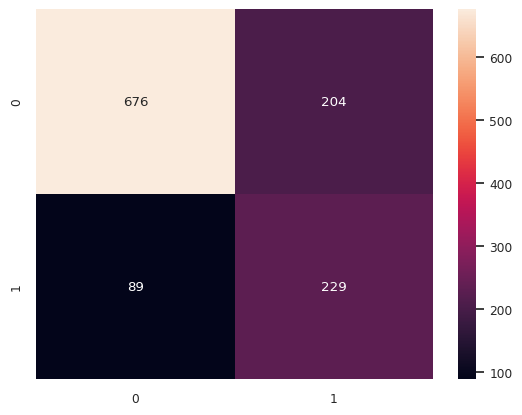

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X_train, y_train_smote)
pred_smote=adaboost.predict(X_test)
cf = confusion_matrix(y_test, pred_smote)
sns.heatmap(cf, annot=True, fmt='.0f');


              precision    recall  f1-score   support

           0       0.88      0.77      0.82       880
           1       0.53      0.72      0.61       318

    accuracy                           0.76      1198
   macro avg       0.71      0.74      0.72      1198
weighted avg       0.79      0.76      0.77      1198



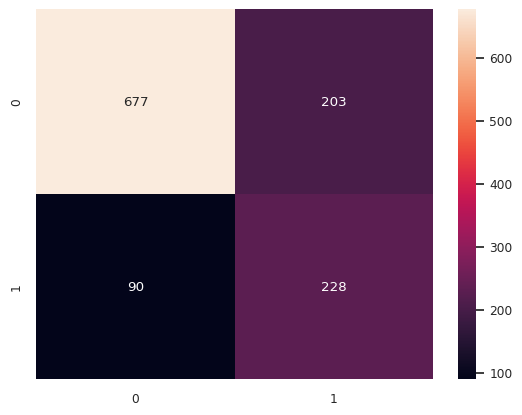

In [ ]:
adaboost.fit(select_X_train, y_train_smote)
pred_smote=adaboost.predict(select_X_test)
cf = confusion_matrix(y_test, pred_smote)
sns.heatmap(cf, annot=True, fmt='.0f');
print(classification_report(y_test, pred_smote))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68       880
           1       0.40      0.86      0.55       318

    accuracy                           0.63      1198
   macro avg       0.66      0.70      0.62      1198
weighted avg       0.78      0.63      0.65      1198



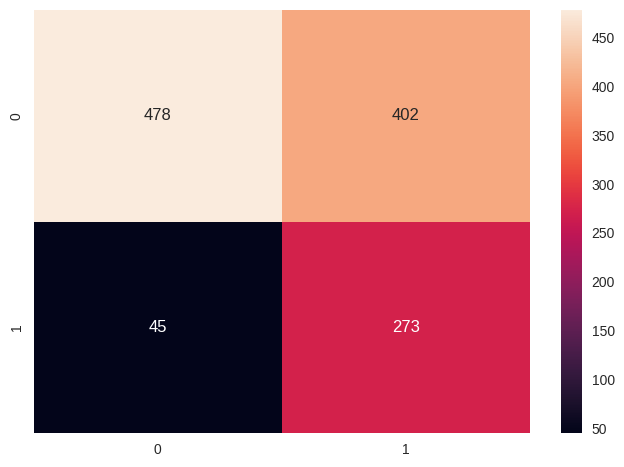

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick.classifier import ClassificationReport


grid = dict()
grid['n_estimators'] = [50, 100, 200]
grid['learning_rate'] = [0.001,0.01,0.1, 0.5]

# define the grid search procedure
grid_search = GridSearchCV(estimator=adaboost, param_grid=grid, n_jobs=-1, cv=5, scoring='recall')
# execute the grid search
grid_result = grid_search.fit(select_X_train, y_train_smote)
best_model=grid_search.best_estimator_
best_model.fit(select_X_train, y_train_smote)
pred_smote=best_model.predict(select_X_test)
cf = confusion_matrix(y_test, pred_smote)
sns.heatmap(cf, annot=True, fmt='.0f');
print(classification_report(y_test, pred_smote))

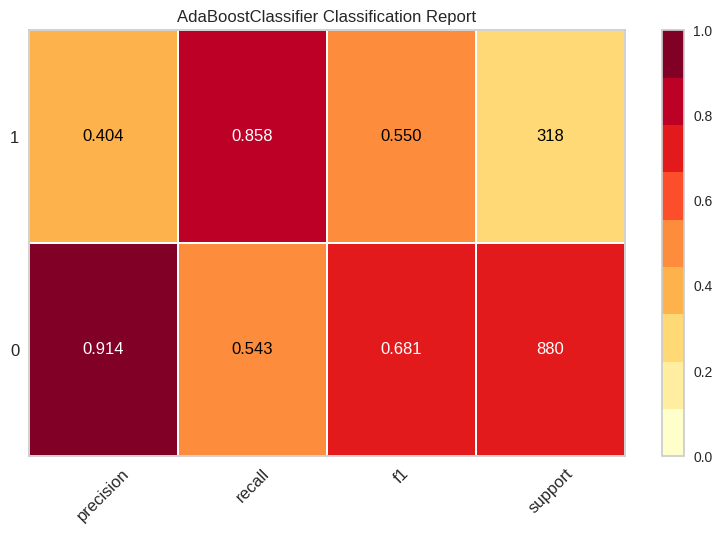

<Axes: title={'center': 'AdaBoostClassifier Classification Report'}>

In [ ]:
visualizer = ClassificationReport(best_model, support=True)
visualizer.fit(select_X_train, y_train_smote)  # Fit the visualizer and the model
visualizer.score(select_X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       880
           1       0.52      0.74      0.61       318

    accuracy                           0.75      1198
   macro avg       0.71      0.75      0.72      1198
weighted avg       0.79      0.75      0.76      1198



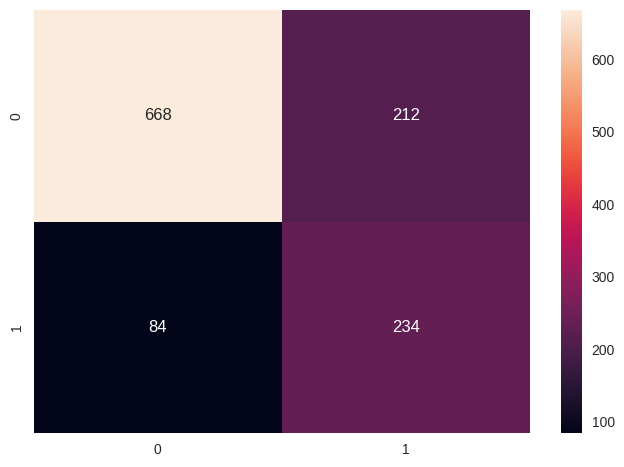

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid = dict()
grid['n_estimators'] = [50, 100, 200]
grid['learning_rate'] = [0.001,0.01,0.1, 0.5]

# define the grid search procedure
grid_search = GridSearchCV(estimator=adaboost, param_grid=grid, n_jobs=-1, cv=5, scoring='f1_macro')
# execute the grid search
grid_result = grid_search.fit(select_X_train, y_train_smote)
best_model=grid_search.best_estimator_
best_model.fit(select_X_train, y_train_smote)
pred_smote=best_model.predict(select_X_test)
cf = confusion_matrix(y_test, pred_smote)
sns.heatmap(cf, annot=True, fmt='.0f');
print(classification_report(y_test, pred_smote))

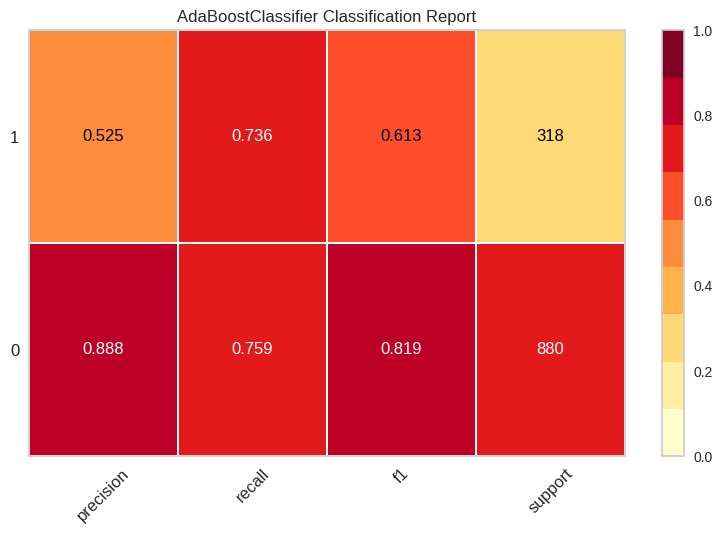

<Axes: title={'center': 'AdaBoostClassifier Classification Report'}>

In [ ]:
visualizer = ClassificationReport(best_model, support=True)
visualizer.fit(select_X_train, y_train_smote)  # Fit the visualizer and the model
visualizer.score(select_X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       880
           1       0.54      0.61      0.57       318

    accuracy                           0.76      1198
   macro avg       0.70      0.71      0.70      1198
weighted avg       0.77      0.76      0.76      1198



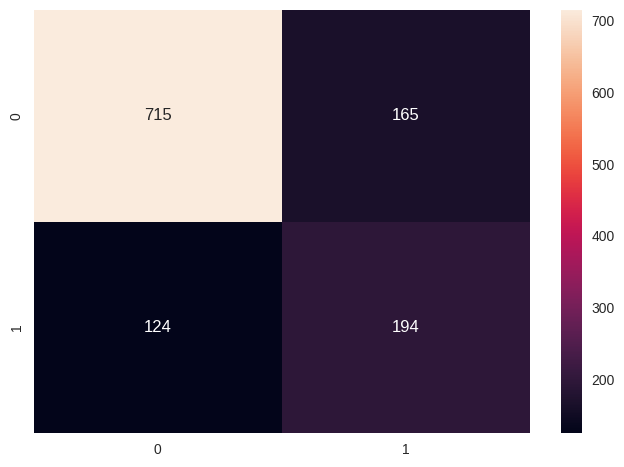

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train_smote)
pred_smote=xgb.predict(X_test)
cf = confusion_matrix(y_test, pred_smote)
sns.heatmap(cf, annot=True, fmt='.0f');
print(classification_report(y_test, pred_smote))

In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# to use evaluation metrics
import sklearn.metrics as metrics



In [ ]:
space={ 
        #'booster': hp.choice('booster',['gbtree', 'dart']),
        'max_depth': hp.quniform("max_depth", 2, 22, 1),
        #'gamma': hp.uniform ('gamma', 0, 1),
        'reg_alpha' : hp.quniform('reg_alpha', 1,50,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.6, 1),
        #'min_child_weight' : hp.quniform('min_child_weight', 1, 40,1),
        'n_estimators': hp.quniform('n_estimators', 1000,3500,100),
        'scale_pos_weight':hp.quniform("scale_pos_weight", 1, 5, 1),       
        'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
        #'subsample': hp.uniform('subsample', 0.5, 0.9),
        'colsample_bylevel' : hp.uniform('colsample_bylevel', 0.6, 1),
        #'max_delta_step' : hp.quniform('max_delta_step', 1, 10,1),
        #'eta' : hp.uniform ('eta', 0, 1),
        'seed': 0
    }

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(space):
                    clf=XGBClassifier(
                    max_depth = int(space['max_depth']),
                    reg_alpha = int(space['reg_alpha']),
                    reg_lambda = space['reg_lambda'],
                    colsample_bytree = space['colsample_bytree'],
                    n_estimators = int(space['n_estimators']),
                    scale_pos_weight = int(space['scale_pos_weight']),
                    learning_rate = space['learning_rate'],
                    colsample_bylevel = space['colsample_bylevel'],
                    seed = 0)

                    f1 = cross_val_score(clf, X_train, y_train_smote, cv=3, scoring='recall').mean()
                       
                    return {'loss': -f1, 'status': STATUS_OK }

trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest, # Tree parzen estimator
            max_evals=20,
            trials=trials)
best

100%|██████████| 20/20 [07:38<00:00, 22.93s/trial, best loss: -0.9423131571469168]


{'colsample_bylevel': 0.9267129379316885,
 'colsample_bytree': 0.7996087498143092,
 'learning_rate': 0.05230346176999152,
 'max_depth': 10.0,
 'n_estimators': 3400.0,
 'reg_alpha': 31.0,
 'reg_lambda': 0.12883004689580269,
 'scale_pos_weight': 5.0}

In [ ]:
best_hyperparams=best

In [ ]:
param_grid = {
              "n_estimators": int(best_hyperparams['n_estimators']),
              "scale_pos_weight": int(best_hyperparams['scale_pos_weight']),              
              "learning_rate": float(best_hyperparams['learning_rate']),             
              "colsample_bytree": float(best_hyperparams['colsample_bytree']),
              "colsample_bylevel": float(best_hyperparams['colsample_bylevel']),             
              "max_depth": int(best_hyperparams['max_depth']),              
              "reg_lambda": float(best_hyperparams['reg_lambda']),
              "reg_alpha": int(best_hyperparams['reg_alpha']),              
              }

XGBModel_tuned = XGBClassifier(**param_grid, random_state=0)
XGBModel_tuned.fit(X_train, y_train_smote, eval_set=[(X_train, y_train_smote), (X_test, y_test)], verbose=False, eval_metric="auc", early_stopping_rounds=10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9267129379316885, colsample_bynode=None,
              colsample_bytree=0.7996087498143092, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05230346176999152,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
pred = XGBModel_tuned.predict(X_test)

acc = metrics.accuracy_score(y_test, pred)  # to compute Accuracy
recall = metrics.recall_score(y_test, pred)  # to compute Recall
precision = metrics.precision_score(y_test, pred)  # to compute Precision
f1 = metrics.f1_score(y_test, pred)  # to compute F1-score
mcc = metrics.matthews_corrcoef(y_test,pred)

# creating a dataframe of metrics
df_perf = pd.DataFrame(
    {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "Matthews Coef": mcc},
    index=[0],
)
df_perf


,Accuracy,Recall,Precision,F1,Matthews Coef
0,0.630217,0.915094,0.411598,0.567805,0.39718


In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(space):
                    clf=XGBClassifier(
                    max_depth = int(space['max_depth']),
                    reg_alpha = int(space['reg_alpha']),
                    reg_lambda = space['reg_lambda'],
                    colsample_bytree = space['colsample_bytree'],
                    n_estimators = int(space['n_estimators']),
                    scale_pos_weight = int(space['scale_pos_weight']),
                    learning_rate = space['learning_rate'],
                    colsample_bylevel = space['colsample_bylevel'],
                    seed = 0)

                    f1 = cross_val_score(clf, X_train, y_train_smote, cv=3, scoring='f1').mean()
                       
                    return {'loss': -f1, 'status': STATUS_OK }

trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest, # Tree parzen estimator
            max_evals=20,
            trials=trials)
best

100%|██████████| 20/20 [06:49<00:00, 20.46s/trial, best loss: -0.8150181196053223]


{'colsample_bylevel': 0.7906857666811684,
 'colsample_bytree': 0.6176988174477008,
 'learning_rate': 0.06404734661424992,
 'max_depth': 16.0,
 'n_estimators': 2100.0,
 'reg_alpha': 3.0,
 'reg_lambda': 0.5632453496574203,
 'scale_pos_weight': 2.0}

In [ ]:
best_hyperparams=best
param_grid = {
              "n_estimators": int(best_hyperparams['n_estimators']),
              "scale_pos_weight": int(best_hyperparams['scale_pos_weight']),              
              "learning_rate": float(best_hyperparams['learning_rate']),             
              "colsample_bytree": float(best_hyperparams['colsample_bytree']),
              "colsample_bylevel": float(best_hyperparams['colsample_bylevel']),             
              "max_depth": int(best_hyperparams['max_depth']),              
              "reg_lambda": float(best_hyperparams['reg_lambda']),
              "reg_alpha": int(best_hyperparams['reg_alpha']),              
              }

XGBModel_tuned = XGBClassifier(**param_grid, random_state=0)
XGBModel_tuned.fit(X_train, y_train_smote, eval_set=[(X_train, y_train_smote), (X_test, y_test)], verbose=False, eval_metric="auc", early_stopping_rounds=10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7906857666811684, colsample_bynode=None,
              colsample_bytree=0.6176988174477008, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06404734661424992,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
pred = XGBModel_tuned.predict(X_test)

acc = metrics.accuracy_score(y_test, pred)  # to compute Accuracy
recall = metrics.recall_score(y_test, pred)  # to compute Recall
precision = metrics.precision_score(y_test, pred)  # to compute Precision
f1 = metrics.f1_score(y_test, pred)  # to compute F1-score


# creating a dataframe of metrics
df_perf = pd.DataFrame(
    {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
    index=[0],
)
df_perf

,Accuracy,Recall,Precision,F1
0,0.722871,0.761006,0.485944,0.593137


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [ ]:
from catboost import CatBoostClassifier
catboost_base = CatBoostClassifier(verbose=False,random_state=0)
idx=column_index(X_train, X_train_cat_ohe.columns)

catboost_base.fit(X_train, y_train_smote,eval_set=(X_test, y_test))
y_pred = catboost_base.predict(X_test)

acc = metrics.accuracy_score(y_test, pred)  # to compute Accuracy
recall = metrics.recall_score(y_test, pred)  # to compute Recall
precision = metrics.precision_score(y_test, pred)  # to compute Precision
f1 = metrics.f1_score(y_test, pred)  # to compute F1-score

model_names = ['Catboost_default']
result_df1 = pd.DataFrame({'Accuracy':acc,'Recall':recall, 'f1':f1, 'Precision':precision}, index=model_names)
result_df1

,Accuracy,Recall,f1,Precision
Catboost_default,0.722871,0.761006,0.593137,0.485944


In [ ]:
from catboost import CatBoostClassifier
catboost_base = CatBoostClassifier(verbose=False,random_state=0)
idx=column_index(X_train, X_train_cat_ohe.columns)
#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = catboost_base, param_grid = grid, scoring ='f1', cv = 5)

gscv.fit(select_X_train, y_train_smote)
best_model=gscv.best_estimator_
y_pred = best_model.predict(X_test)

acc = metrics.accuracy_score(y_test, pred)  # to compute Accuracy
recall = metrics.recall_score(y_test, pred)  # to compute Recall
precision = metrics.precision_score(y_test, pred)  # to compute Precision
f1 = metrics.f1_score(y_test, pred)  # to compute F1-score

model_names = ['Catboost_default']
result_df1 = pd.DataFrame({'Accuracy':acc,'Recall':recall, 'f1':f1, 'Precision':precision}, index=model_names)
result_df1

,Accuracy,Recall,f1,Precision
Catboost_default,0.722871,0.761006,0.593137,0.485944


In [ ]:
PYCARET

In [ ]:
from pycaret.classification import *
#X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
clf = setup(data=pd.concat([X_train, y_train_smote],axis=1), 
            target = 'Churn', 
            session_id=13,           
            feature_selection=True,  

            
            experiment_name='swiss1',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7038, 48)"
4,Transformed data shape,"(7038, 10)"
5,Transformed train set shape,"(4926, 10)"
6,Transformed test set shape,"(2112, 10)"
7,Numeric features,47
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(fold=5, sort='recall')
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8130,0.8893,0.8279,0.8043,0.8159,0.6261,0.6264,2.8220
lightgbm,Light Gradient Boosting Machine,0.8053,0.8877,0.8214,0.7959,0.8084,0.6106,0.6110,0.2100
ada,Ada Boost Classifier,0.7852,0.8597,0.8197,0.7670,0.7925,0.5704,0.5718,0.3220
xgboost,Extreme Gradient Boosting,0.8067,0.8860,0.8161,0.8011,0.8084,0.6135,0.6137,0.4640
ridge,Ridge Classifier,0.7875,0.0000,0.8128,0.7737,0.7928,0.5749,0.5757,0.0880
lda,Linear Discriminant Analysis,0.7873,0.8655,0.8124,0.7736,0.7925,0.5745,0.5753,0.1180
gbc,Gradient Boosting Classifier,0.7909,0.8719,0.8116,0.7797,0.7953,0.5818,0.5824,0.6220
svm,SVM - Linear Kernel,0.7771,0.0000,0.8092,0.7631,0.7834,0.5542,0.5586,0.0980
lr,Logistic Regression,0.7889,0.8671,0.8055,0.7796,0.7923,0.5777,0.5782,1.0420
rf,Random Forest Classifier,0.8025,0.8812,0.8023,0.8027,0.8024,0.6050,0.6051,0.6200


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
ad = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8154,0.8863,0.8316,0.8055,0.8184,0.6308,0.6312
1,0.8183,0.8847,0.8418,0.8043,0.8226,0.6365,0.6372
2,0.7878,0.8660,0.7972,0.7829,0.7899,0.5756,0.5757
3,0.8234,0.8942,0.8476,0.8081,0.8274,0.6467,0.6475
4,0.8203,0.9044,0.8191,0.8208,0.8199,0.6406,0.6406
Mean,0.8130,0.8871,0.8275,0.8043,0.8156,0.6261,0.6264
Std,0.0129,0.0127,0.0180,0.0122,0.0132,0.0257,0.0259


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

tuned_rf = tune_model(ad, n_iter=10,
                      search_library='scikit-learn',
                      search_algorithm='random',
                      custom_grid={
                          'n_estimators': [50,100, 200, 300, 400, 500],
                          'learning_rate': [0.001,0.01,0.1]
                          
                      },
                      optimize='recall',
                      fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8398,0.9024,0.8623,0.8256,0.8436,0.6795,0.6802
1,0.8093,0.8970,0.8340,0.7954,0.8142,0.6186,0.6194
2,0.8296,0.9070,0.8381,0.8247,0.8313,0.6592,0.6593
3,0.8012,0.8641,0.8455,0.7761,0.8093,0.6025,0.6049
4,0.7890,0.8838,0.8293,0.7669,0.7969,0.5782,0.5801
5,0.8195,0.8718,0.8333,0.8103,0.8216,0.6390,0.6392
6,0.8171,0.8985,0.8415,0.8023,0.8214,0.6341,0.6349
7,0.8150,0.8968,0.8293,0.8063,0.8176,0.6301,0.6303
8,0.8150,0.9086,0.8089,0.8189,0.8139,0.6301,0.6301


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_rf

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=13, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

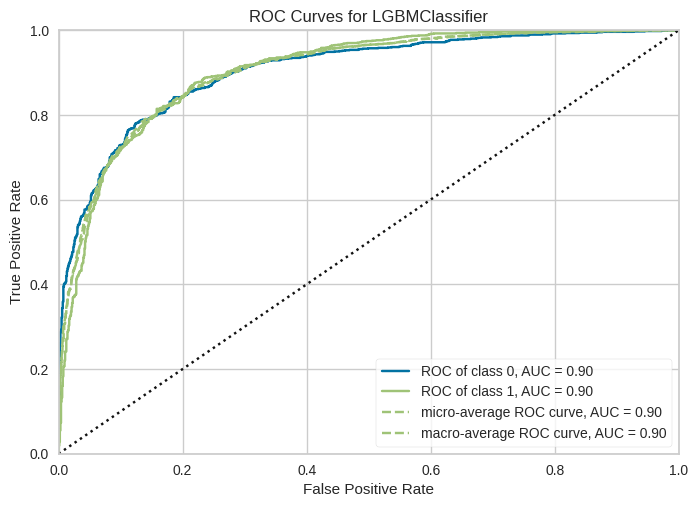

In [ ]:
plot_model(tuned_rf)

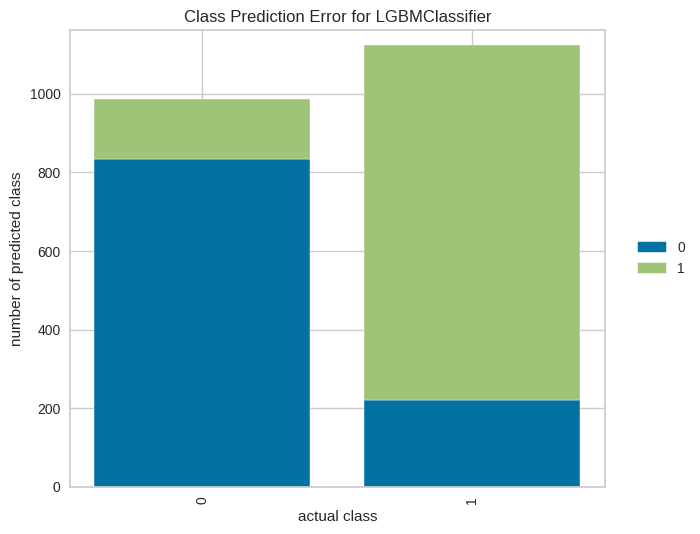

In [ ]:
plot_model(tuned_rf, plot='error')

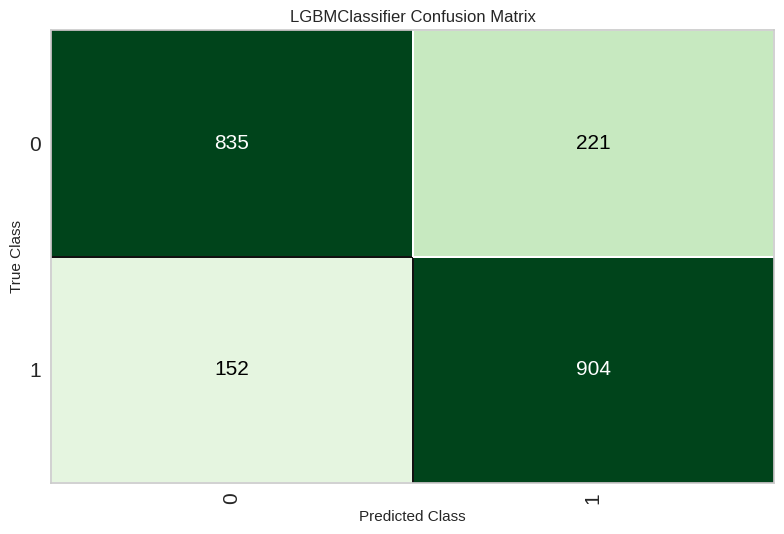

In [ ]:
plot_model(tuned_rf, plot='confusion_matrix')

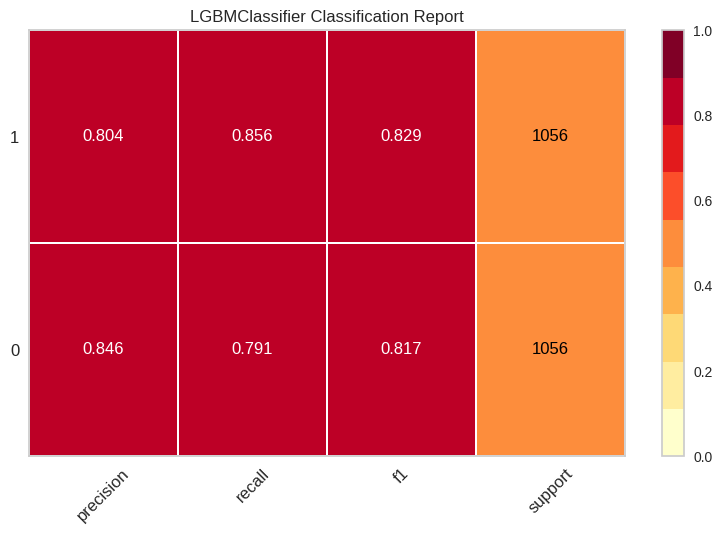

In [ ]:
plot_model(tuned_rf, plot='class_report')

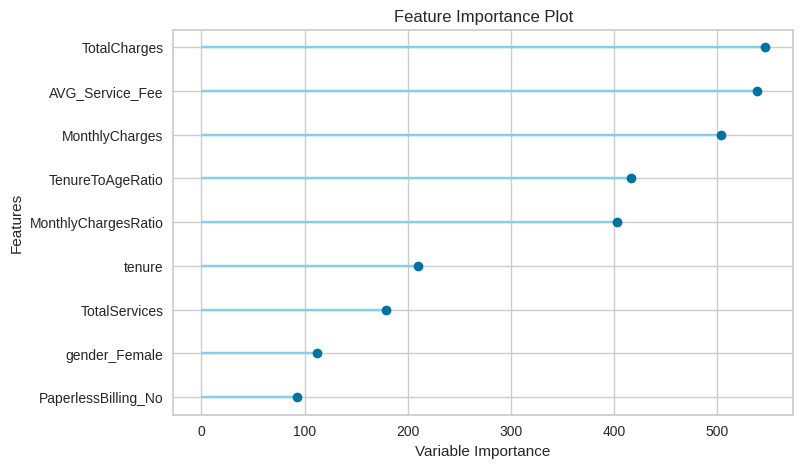

In [ ]:
plot_model(tuned_rf, plot='feature')

In [ ]:
interpret_model(tuned_rf, plot='msa')